# Задание 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1
1. Установи библиотеку `sympy`.
2. Используя ее функции, напиши свою функцию, которая 
на вход примет математическую функцию `y=f(x)` вида `x**2 - x + 21`, и вернёт производную: `2𝑥−1`.

In [2]:
# !pip install sympy

In [3]:
import sympy
from sympy import Symbol
from sympy import *

In [4]:
x = symbols('x')

def derivative_1(func):
    return diff(func, x)

In [5]:
y = x**2 - x + 21

In [6]:
derivative_1(y)

2*x - 1

## Task 2
1. Напиши функцию, которая на вход примет математическую функцию `p = f(x, y)`, 
зависящую от двух переменных вида `(x-y)**2`, а также ту переменную, по которой нужно посчитать частную производную.
Функция должна вернуть частную производную по выбранной переменной.

In [7]:
x, y = symbols('x y')

def derivative_2(func, var):
    return diff(func, var, 1)

In [8]:
p = (x-y)**2

In [9]:
derivative_2(p, x)

2*x - 2*y

In [10]:
derivative_2(p, y)

-2*x + 2*y

## Task 3

Представь, что у нас есть истинное значений `y_true` и предсказанное значение `y_pred`, описанное линейнным уравнением вида `y_pred = w*x + b`
1. Выведите формулу квадратного отклонения между истинным и предсказанным значениями. 
2. Вычислите частные производные полученной формулу квадратного отклонения по переменным `w` и `b`.

In [11]:
y_true, w, x, b = symbols('y_true w x b')
sq_er = (y_true - (w*x + b))**2 
sq_er

(-b - w*x + y_true)**2

In [12]:
diff(sq_er, w)

# -2 * x * (y_true - w * x - b)

-2*x*(-b - w*x + y_true)

In [13]:
diff(sq_er, b)

# -2 * (y_true - w * x - b)

2*b + 2*w*x - 2*y_true

## Task 4
Теперь мы с вами подошли к самому главному - реализации алгоритма [градиентного спуска](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0).
1. В этот раз тебе нужно написать класс `Gradient()`, который будет состоять из нескольких методов. Объект при 
инициализации получает два вектора: `X`, `Y`. Далее методы обращаются к ним уже внутри класса: 
     * `predict`: на вход она получает `w`, `b`, на выход она выдаёт прогнозные значения `Y_pred`;
     * `mse`: на вход она получает `Y_pred`, на выход выдает посчитанное MSE;
     * `update`: на вход она получает `w`, `b` и `a` (наш learning rate). Сделайте по умолчанию значение `a=0.0001`. А на \ 
выходe метод выдаёт новые значения `w`, `b`, которые обновились благодаря посчитанным градиентам.
2. Проверь работу методов, подав на вход класса два вектора `X`, `Y` и начальные параметры `w`, `b` в требуемые методы.

P.S. Тут лучше все писать через numpy, потому что все вычисления будут в векторном виде. Через numpy это будет сделать удобнее)

In [14]:
X = np.array(
    [32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787, 55.14218841, 
     52.21179669, 39.29956669, 48.10504169, 52.55001444, 45.41973014, 54.35163488, 
     44.1640495 , 58.16847072, 56.72720806, 48.95588857, 44.68719623, 60.29732685, 
     45.61864377, 38.81681754]
)
Y = np.array(
    [31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513, 78.21151827, 
     79.64197305, 59.17148932, 75.3312423 , 71.30087989, 55.16567715, 82.47884676, 
     62.00892325, 75.39287043, 81.43619216, 60.72360244, 82.89250373, 97.37989686, 
     48.84715332, 56.87721319]
)

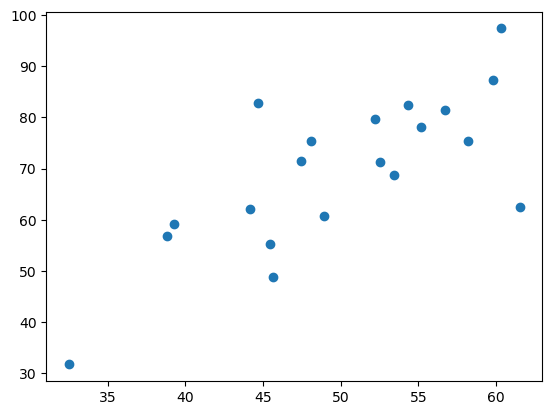

In [15]:
plt.scatter(X, Y);

In [16]:
class Gradient:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        
    def predict(self, w, b):
        Y_pred = w * self.X + b
        return Y_pred
    
    def mse(self, Y_pred):
        mse = np.mean((self.Y - Y_pred)**2)
        return mse

    def update(self, w, b, a=0.0001):
        w = w - a * (-2 * np.sum(self.X.dot(self.Y - w * self.X - b)) / len(X))
        b = b - a * (-2 * (np.sum(self.Y - w * self.X - b)) / len(X))
        return w, b

In [17]:
gradient = Gradient(X, Y)

In [18]:
Y_pred = gradient.predict(0.5, 4)

Y_pred

array([20.25117263, 30.71340201, 34.76517902, 27.73781982, 33.90660393,
       31.57109421, 30.10589834, 23.64978334, 28.05252085, 30.27500722,
       26.70986507, 31.17581744, 26.08202475, 33.08423536, 32.36360403,
       28.47794428, 26.34359811, 34.14866342, 26.80932188, 23.40840877])

In [19]:
mse = gradient.mse(Y_pred)

mse

1784.8517253411974

In [20]:
w_new, b_new = gradient.update(0.5, 4)

In [21]:
w_new

0.9150528224014476

In [22]:
b_new

4.003943052450454

## Task 5
Улучшите ваш код таким образом, чтобы появился метод `optimize`. На вход метод принимает `num_iterations`, `stopping_threshold=0.001`, `a=0.000001`. 
Метод должен итеративным образом пройти какое-то количество раз обновление значений `w`, `b`, 
придя к оптимальному значению. Критерии останова:
  * если было превышено количество заранее заданных итераций `num_iterations`;
  * если новая итерация выдала разницу между текущей ошибкой и ошибкой прошлой итерации значение, меньшее, чем `stopping_threshold`;
  * метод должен вернуть финальные значения `w`, `b`, и `mse`.

In [23]:
class GradientDescent(Gradient):
    
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        
    def optimize(self, num_iterations, stopping_threshold=0.001, a=0.000001):
        # пропишу изначальные вес и отклонение: 
        w_new, b_new = self.update(0.5, 4)

        # ход градиентного спуска: 
        for i in range(num_iterations):

            # расчет ошибки для новых w и b: 
            Y_pred_new = self.predict(w_new, b_new)
            mse_new = self.mse(Y_pred_new)
           
            if abs(mse - mse_new) < stopping_threshold:
                break
            else:
                # расчет нового веса w: 
                w_new, b_new = self.update(w_new, b_new)
                #print(i, w_new, b_new, mse_new)
            
        return w_new, b_new, mse_new

In [24]:
gra_des = GradientDescent(X, Y)

In [25]:
gra_des.optimize(num_iterations=100, stopping_threshold=0.001, a=0.001)

(1.3121118066473558, 4.005173202925906, 99.29460140812496)